# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Métodos de Regresión</center>
### <center> Práctica Regresión Logística </center>

#### Links interesantes
 * scikit-learn.org
 * pandas.pydata.org
 * scikit-yb.org
 * matplotlib.org
 * seaborn.pydata.org


Importamos las librerías generales que vamos a necesitar

In [18]:
#Librerías para manejos de datos
import pandas as pd
import numpy as np

#Librerías para gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#Otras librerías
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

Importamos librerías de modelos

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score

#### Introducción

### Clasificación Binaria

#### Problema 1: Clasificación simple en 1 dimensión

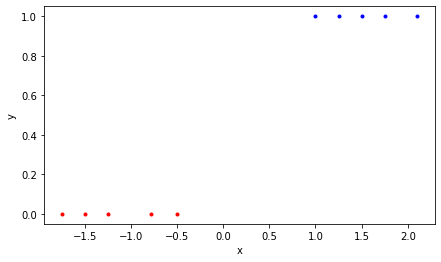

In [20]:
#Generamos un dataset sintético
x = np.array([[1,1.5,1.25,2.1,1.75,-0.5,-0.78,-1.25,-1.5,-1.75]]).reshape(10,1) 
y = np.array([[1,1,1,1,1,0,0,0,0,0]]).reshape(10,1)

plt.figure(figsize=(7, 4))

plt.plot(x[y==0],y[y==0],'r.')
plt.plot(x[y==1],y[y==1],'b.')

plt.xlabel("x")
plt.ylabel("y")

plt.show()

¿Qué pasa si utilizamos una regresión lineal, para luego separar las clases en función de su resultado?

In [21]:
#Creo un regresor lineal
modelo_lineal_simple = LinearRegression()

#Doy el formato adecuado a las variables dependiente e independiente
x_=x.reshape(-1, 1)
y_=y.reshape(-1, 1)

#Ajusto el modelo
modelo_lineal_simple.fit(x_,y_)

#Parámetros estimados
B1_e=round(modelo_lineal_simple.coef_[0][0],2)
B0_e=round(modelo_lineal_simple.intercept_[0],2)

#Muestro el modelo
print(f" El modelo lineal simple ajustado es : y = {B1_e} * X  + {B0_e}")

 El modelo lineal simple ajustado es : y = 0.34 * X  + 0.44


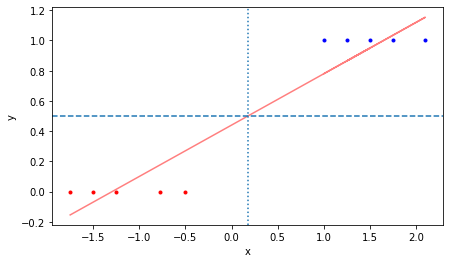

In [22]:
#Calculo los valores que estima mi modelo lineal simple
corte=0.5

y_e=B1_e *x_ + B0_e
x_limite=(corte-B0_e)/B1_e

#Grafico las observaciones reales + las estimadas
plt.figure(figsize=(7, 4))
plt.xlabel("x")
plt.ylabel("y")

plt.plot(x[y==0],y[y==0],'r.')
plt.plot(x[y==1],y[y==1],'b.')

plt.plot(x_,y_e,label='data', color='red',alpha=0.5)
plt.axvline(x=x_limite,linestyle="dotted")
plt.axhline(y=corte,linestyle="dashed")
plt.show()

Necesitamos un criterio para dividir en 2 clases. <br>
Usemos, si y estimado < 0,5 la observación pertenecerá a la clase 0 si no a la clase 1

#### Problema 2: Clasificación compleja en 1 dimensión

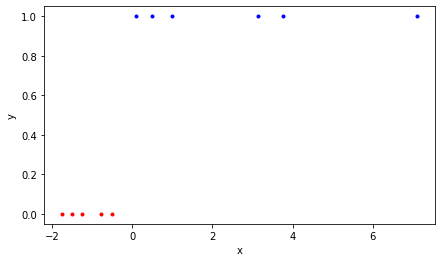

In [23]:
corte=0.5
x_limite=(corte-B0_e)/B1_e

x2 = np.array([[1,0.5,3.15,7.1,3.75,-0.5,-0.78,-1.25,-1.5,-1.75,0.1]]).reshape(11,1) # input data
y2 = np.array([[1,1,1,1,1,0,0,0,0,0,1]]).reshape(11,1) # target

plt.figure(figsize=(7, 4))
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x2[y2==0],y2[y2==0],'r.')
plt.plot(x2[y2==1],y2[y2==1],'b.')
plt.show()

In [24]:
#Creo un regresor lineal
modelo_lineal_simple = LinearRegression()

#Doy el formato adecuado a las variables dependiente e independiente
x2_=x2.reshape(-1, 1)
y2_=y2.reshape(-1, 1)

#Ajusto el modelo
modelo_lineal_simple.fit(x2_,y2_)

#Parámetros estimados
B1_e=round(modelo_lineal_simple.coef_[0][0],2)
B0_e=round(modelo_lineal_simple.intercept_[0],2)

#Muestro el modelo
print(f" El modelo lineal simple ajustado es : y = {B1_e} * X  + {B0_e}")

 El modelo lineal simple ajustado es : y = 0.14 * X  + 0.42


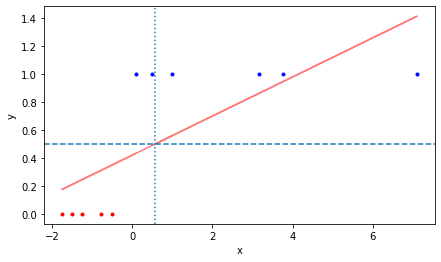

In [25]:
#Calculo los valores que estima mi modelo lineal simple
corte=0.5

y2_e=B1_e *x2_ + B0_e
x2_limite=(corte-B0_e)/B1_e

#Grafico las observaciones reales + las estimadas
plt.figure(figsize=(7, 4))
plt.xlabel("x")
plt.ylabel("y")

plt.plot(x2[y2==0],y2[y2==0],'r.')
plt.plot(x2[y2==1],y2[y2==1],'b.')
plt.plot(x2_,y2_e,label='data', color='red',alpha=0.5)
plt.axvline(x=x2_limite,linestyle="dotted")
plt.axhline(y=corte,linestyle="dashed")

plt.show()

### Regresión Logística

Función Sigmoidea

\begin{equation}
s(z) = \frac{1}{1 + e^{-z}}
\end{equation}

¿Qué forma tiene?

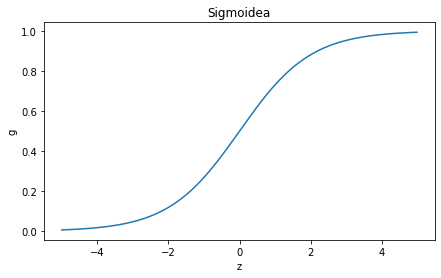

In [32]:
s = np.arange( -5, 5, 0.01)
g = 1/(1 + np.exp(-s))
plt.figure(figsize=(7, 4))
plt.plot(s,g)
plt.xlabel("z")
plt.ylabel("g")
plt.title("Sigmoidea")
plt.show()

¿Cuáles son los parámetros del modelo?

$$s_\theta(x) = g(\beta^T x) =  \frac{1}{1+ e^{(-\beta^T x)}}$$

La salida de la función sigmoidea es continua entre 0 y 1, pudiéndose interpretar como probabilidad de pertenencia a la clase 1

Seguimos necesitando definir un umbral, continuemos considerando 0,5
  * Si $s_\beta(x) < 0.5$  entonces $x$ pertencerá a la clase 0
  * Si $s_\beta(x) \ge 0.5$  entonces $x$ pertencerá a la clase 1

Elegir como umbral 0.5 nos da una imterpretación simple de  $\beta^Tx$:
$$ s_\theta(x) = 0.5 \\ \Rightarrow \beta^Tx = 0$$ 
Es la ecuación de un hiperplano! 


Por ejemplo:

$\beta_0 +\beta_1 x_1 + \beta_2 x_2 =0 $

Se puede transformar en:

$- \beta_2 x_2 = \beta_0 +\beta_1 x_1 $

$ x_2 =   - \frac{\beta_1}{\beta_2} x_1 - \frac{\beta_0}{\beta_2}$

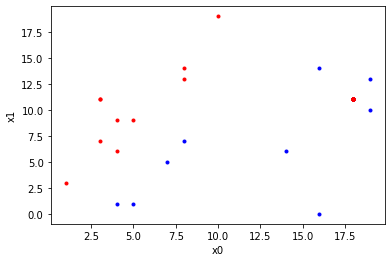

In [27]:
#Genero un dataset sintético
X = np.random.randint(20,size=(20,2))
beta = np.array([[-0.1],[0.1]])
Y = np.round( 1/(1+np.exp(np.dot(-X, beta))))

ind0 = np.where(Y==0)
ind1 = np.where(Y==1)
plt.plot(X[ind0,0],X[ind0,1],'b.') 
plt.plot(X[ind1,0],X[ind1,1],'r.')
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()

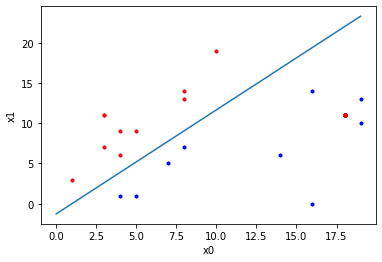

In [28]:
clf = LogisticRegression()
clf.fit(X, Y)

beta_0 = clf.intercept_
beta_1 = clf.coef_[0,0]
beta_2 = clf.coef_[0,1]
x1 = np.arange(0,20,1)
x2 = - beta_1/beta_2*x1 - beta_0/beta_2
plt.plot(x1,x2)

ind0 = np.where(Y==0)
ind1 = np.where(Y==1)
plt.plot(X[ind0,0],X[ind0,1],'b.') 
plt.plot(X[ind1,0],X[ind1,1],'r.')
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()

Volviendo a nuestro ejemplo complejo de 1 dimensión

In [29]:
modelo_rl = LogisticRegression()
modelo_rl.fit(x2, y2)

y_pred_modelo_rl = modelo_rl.predict(x2)
y_pred_proba_modelo_rl = modelo_rl.predict_proba(x2)[:, 1]

ValueError: ignored

In [ ]:
#Calculo los valores que estima mi modelo lineal simple
corte=0.5

y2_e=B1_e *x2_ + B0_e
x2_limite=0

#Grafico las observaciones reales + las estimadas
plt.figure(figsize=(7, 4))
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x2,y2,label='data', color='blue',alpha=0.5,marker='.')
plt.scatter(x2,y_pred_proba_modelo_rl,label='data', color='red',alpha=0.5,marker='.')
plt.axvline(x=x2_limite,linestyle="dotted")
plt.axhline(y=corte,linestyle="dashed")
plt.show()

### Métricas

* $Accuracy =\frac{TP+TN}{TP+TN+FP+FN}$
<br><br>
* $Precison = \frac{TP}{TP + FP}$
<br><br>
* $Recall =\frac{TP}{TP + FN}$
<br><br>
* $F1-score =\frac{2}{\frac{1}{Precision} + \frac{1}{Recall}}$
<br><br>
* $TPR$ sinonimo de $Recall$ - (True Positive Rate)
<br><br>
* $FPR = \frac{FP}{FP + TN}$ - (False Positive Rate)
<br><br>
* AUC:  Area Under (ROC) Curve

# Extensión a más de 2 clases

### Softmax

$$
\begin{array}{lcl}
        h_\beta(x)  &=& \left[
                  \begin{array}{l}
                        \frac {\exp(\beta_1^T x)}{\sum_{j=1}^k \exp(\beta_j^T x)}\\
                        \frac {\exp(\beta_2^T x)}{\sum_{j=1}^k \exp(\beta_j^T x)} \\
                        \vdots \\
                        \frac {\exp(\beta_{k-1}^T x)}{\sum_{j=1}^k \exp(\beta_j^T x)}                  
                  \end{array} 
                 \right]
\end{array}
$$


Esta función devuelve la probabilidad condicional de que una observación $x$ pertenezca a cada una de las clases posibles

$\qquad$$p(y=i|x;\beta) $ for $i = 1, \dots,k-1$, 

and the probability for class $k$ is: 

$\qquad$$p(y=k|x;\beta) = 1-\sum_{i=1}^{k-1} \frac{\exp(\beta_i^T x)}{\sum_{j=1}^k \exp(\beta_j^T x)}$.

### Entrenamiento y validación

El dataset lo debemos dividir en 2 conjuntos de datos. <br>
Un conjunto lo utilizamos para entrenar el modelo (buscar parámetros) y el otro conjunto lo usaremos para evaluar al modelo creado

### Validación cruzada

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png">